In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import datetime as dt

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.iloc[1]['description']

'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

In [5]:
# Change the date to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = pd.to_datetime(df['release_year'], format="%Y").dt.year

Look for missing values in the dataframe

In [7]:
for i in df.columns:
    print("{} missing data: {}/{}".format(i, df[i].isna().sum(), df[i].count() ))

show_id missing data: 0/7787
type missing data: 0/7787
title missing data: 0/7787
director missing data: 2389/5398
cast missing data: 718/7069
country missing data: 507/7280
date_added missing data: 10/7777
release_year missing data: 0/7787
rating missing data: 7/7780
duration missing data: 0/7787
listed_in missing data: 0/7787
description missing data: 0/7787


### Filling Missing Values

For "rating" and "country" missing values, use the most common value based on content type - TV Show or Movie 
<br>For missing cast/director information, use "NA" to show that the data is missing

In [8]:
# Dealing with missing values
# Rating: use the most common rating for TV Show and Movie
rating_movie = df[df['type']=='Movie']['rating'].mode()[0]
rating_tv = df[df['type']=='TV Show']['rating'].mode()[0]

# Country: use the most common country for TV Show and Movie
country_movie = df[df['type']=='Movie']['country'].mode()[0]
country_tv = df[df['type']=='TV Show']['country'].mode()[0]

# Rating and Country is filled in the next code

# Cast: Use NA
df['cast'].fillna("NA", inplace=True)

# Director: Use NA
df['director'].fillna("NA", inplace=True)

In [9]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NA,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NA,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NA,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [10]:
# Conditional replacing NaN values using apply

# First change NaN to "temp"
df['rating'] = df['rating'].fillna("temp")
# Use apply function to change temp to rating for both "Movie" and "TV Show"
df['rating'] = df.apply(
        lambda row: rating_movie if (row['type']=='Movie') & (row['rating']=='temp') else row['rating'], axis=1)
df['rating'] = df.apply(
        lambda row: rating_tv if (row['type']=='TV Show') & (row['rating']=='temp') else row['rating'], axis=1)

In [11]:
# Check if there are any "Nan" or "temp" values in ratings
df[df['rating']=='temp']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [12]:
df[df['country'].isna()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,TV Show,Feb-09,NA,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NA,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NaN,2019-03-30,2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NA,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,TV-MA,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,2019-12-31,2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NaN,2019-01-05,2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...


In [13]:
# Repeat the same method for filling missing Country values for Movie and TV Show

df['country'] = df['country'].fillna("temp")
df['country'] = df.apply(
    lambda row: country_movie if (row['type']=='Movie') & (row['country']=='temp') else row['country'], axis=1)
df['country'] = df.apply(
    lambda row: country_tv if (row['type']=='TV Show') & (row['country']=='temp') else row['country'], axis=1)

In [14]:
for i in df.columns:
    print("{} missing data: {}/{}".format(i, df[i].isna().sum(), df[i].count() ))

show_id missing data: 0/7787
type missing data: 0/7787
title missing data: 0/7787
director missing data: 0/7787
cast missing data: 0/7787
country missing data: 0/7787
date_added missing data: 10/7777
release_year missing data: 0/7787
rating missing data: 0/7787
duration missing data: 0/7787
listed_in missing data: 0/7787
description missing data: 0/7787


### Missing value for date_added

There are few entries with missing "date_added" field. However, the "release_year" field is present for all entries. So, for the missing entries, use the release_year of that entry and use 01 Jan as the default date of release.

In [15]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,NA,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,NA,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,NA,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,NA,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,NA,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NA,Igor Dmitriev,United States,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,NA,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,NA,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,NA,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,NA,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [16]:
df['date_added'] = df['date_added'].fillna("temp")
df['date_added'] = df.apply(
    lambda row: pd.to_datetime(row['release_year'], format="%Y") if row['date_added']=="temp" else row['date_added'],
    axis=1
)

In [17]:
for i in df.columns:
    print("{} missing data: {}/{}".format(i, df[i].isna().sum(), df[i].count() ))

show_id missing data: 0/7787
type missing data: 0/7787
title missing data: 0/7787
director missing data: 0/7787
cast missing data: 0/7787
country missing data: 0/7787
date_added missing data: 0/7787
release_year missing data: 0/7787
rating missing data: 0/7787
duration missing data: 0/7787
listed_in missing data: 0/7787
description missing data: 0/7787


In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NA,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### New columns for duration of content
Make new fields called **no_seasons** (for TV Shows) and **movie_duration**.
<br>This information can be got from the "duration" column of the dataset.
<br><br>
Note: Use NaN where applicable

In [19]:
# New field  "no_seasons" with the no. of seasons for TV shows 
df['no_seasons'] = df['duration'].apply(lambda cell: int(cell.split()[0]) if "Season" in cell else np.nan)

In [20]:
# DO a similar (as 'no_seasons') to get a new column for "movie duration". If it is a TV Show, then put the value as NA
df['movie_duration'] = df['duration'].apply(lambda cell: int(cell[:-4]) if "min" in cell else np.nan)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_seasons,movie_duration
0,s1,TV Show,3%,NA,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0,NaN
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,NaN,93.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",NaN,78.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",NaN,80.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,NaN,123.0


### Analysis of the Content available in the dataset
1. Find the type of content available
2. Most no. of TV Show seasons
3. Common duration of Movies
4. Find the growth of content added over the years

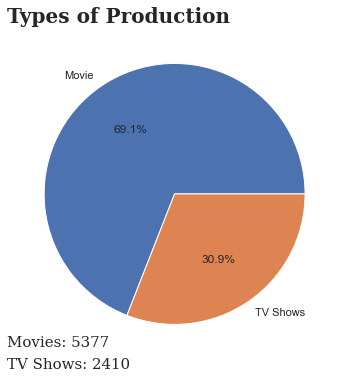

In [21]:
mov = np.sum(df['type']=='Movie')
tv = np.sum(df['type']=='TV Show')
sns.set()
fig, ax = plt.subplots(1, figsize=(6,6))
plt.pie(x=[mov, tv], labels=['Movie', 'TV Shows'], autopct='%.1f%%')
fig.text(0.125, 0.9, "Types of Production", fontsize=20, fontweight="bold", fontfamily="serif")
fig.text(0.125, 0.150, "{}: {}".format('Movies', mov), fontsize=15, fontweight="light", fontfamily="serif")
fig.text(0.125, 0.100, "{}: {}".format('TV Shows', tv), fontsize=15, fontweight="light", fontfamily="serif")

plt.show()

### TV Shows
The no. of seasons count for the TV shows

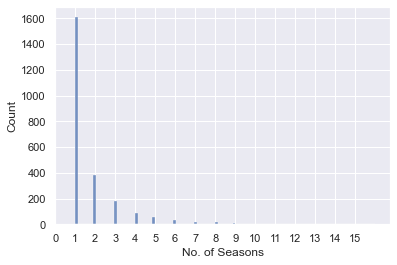

In [22]:
sns.histplot(data=df, x="no_seasons")
plt.xticks(np.arange(len(df['no_seasons'].unique())))
plt.xlabel("No. of Seasons")
plt.show()

Most TV Shows have only 1 season. Only few TV shows are renewed for further seasons. This could mean that most TV shows are not popular since it was not renewed for more seasons. It could also be due to more cost and time requiements for producing TV Shows.

### Movie Duration

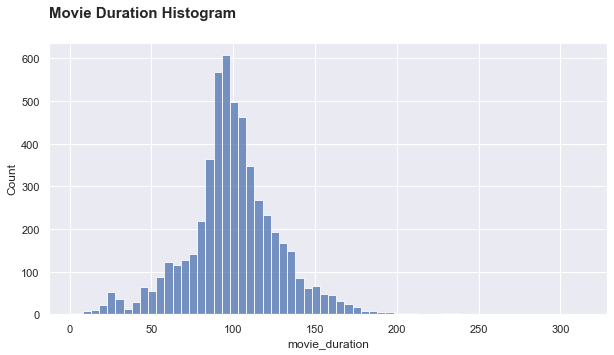

In [23]:
fig, ax = plt.subplots(1, figsize=(10,5))
sns.histplot(data=df, x="movie_duration", binwidth=5, ax=ax)
fig.text(0.125, 0.95, "Movie Duration Histogram", fontsize=15, fontweight="bold")
plt.show()

Most movies have duration around 90-120 mintues.

### Content produced by countries
Here we look at the type of content - Movies or TV Shows - produced by the top 10 countries.

In [24]:
df['main_country'] = df['country'].apply(lambda cell: cell.split(',')[0])

In [25]:
t2 = df.groupby(['main_country', 'type']).agg({'type':np.count_nonzero}).rename(columns={'type':'count'})
t2 = t2.reset_index()

In [26]:
t2.head()

,main_country,type,count
0,Argentina,Movie,50
1,Argentina,TV Show,18
2,Australia,Movie,56
3,Australia,TV Show,52
4,Austria,Movie,7


In [27]:
# Use Pivot Table to get Country vs Movie/TV data
t2 = t2.pivot_table(values='count', index='main_country', columns='type', aggfunc=[np.mean]).fillna(0)
t2.head()

mean        
type         Movie TV Show
main_country              
Argentina     50.0    18.0
Australia     56.0    52.0
Austria        7.0     1.0
Bangladesh     2.0     0.0
Belarus        0.0     1.0

In [28]:
t2.columns

MultiIndex([('mean',   'Movie'),
            ('mean', 'TV Show')],
           names=[None, 'type'])

In [29]:
# Rename the multi indexed columns
t2.columns = t2.columns.map('_'.join).str.replace('mean_','')

In [30]:
# Take the top 10 from the df to plot
t2_plot = t2.sort_values(by='Movie', ascending=False)[:10]

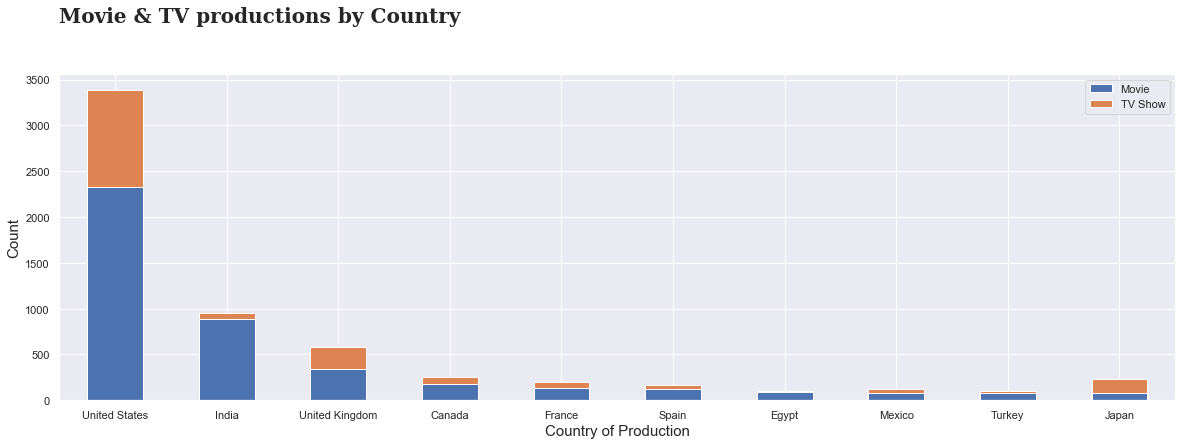

In [31]:
fig, ax = plt.subplots(1, figsize=(20,6))
t2_plot.plot(kind='bar', stacked=True, ax=ax)
plt.xticks(rotation=0)
plt.xlabel("Country of Production", fontsize=15)
plt.ylabel("Count", fontsize=15)
#plt.title("Movie & TV productions by Country", fontsize=15)
fig.text(0.125, 1, "Movie & TV productions by Country", fontsize=20, fontweight='bold', fontfamily='serif')
plt.show()

Netflix produces the most content in the United States, followed by India and United Kingdom. Also, it focuses primarily on producing **Movies** rather than TV Shows.

### Content added over the years
1. Split the dataset into two frames based on content type - Movie or TV Show
2. Find the no of content for each type based on release year
3. Combine the two frames for plotting
    <br>a. Index as "release year"
    <br>b. Columns as "movie_count" and "tv_show_count"

In [32]:
df_tv = df[df['type']=="TV Show"]
df_movie = df[df['type']=="Movie"]
print("#tv shows = ",len(df_tv))
print("#movies = ",len(df_movie))

#tv shows =  2410
#movies =  5377


In [33]:
t_movie = df_movie.groupby('release_year').agg({'release_year':np.count_nonzero}).rename(columns={'release_year':'count'})
t_tv = df_tv.groupby('release_year').agg({'release_year':np.count_nonzero}).rename(columns={'release_year':'count'})

In [34]:
print("#Entries for Movie: {}\nStart year: {}\nEnd Year: {}".format(len(t_movie), t_movie.index[0], t_movie.index[-1]))
print("\n#Entries for TV Shows: {}\nStart year: {}\nEnd Year: {}".format(len(t_tv), t_tv.index[0], t_tv.index[-1]))

#Entries for Movie: 72
Start year: 1942
End Year: 2021

#Entries for TV Shows: 46
Start year: 1925
End Year: 2021


In [35]:
t_plot = pd.merge(left=t_movie, right=t_tv, how='outer', left_index=True, right_index=True).fillna(0)
t_plot.rename(columns={'count_x':'Movies', 'count_y':'TV Shows'}, inplace=True)
t_plot.head()

,Movies,TV Shows
release_year,,
1925,0.0,1.0
1942,2.0,0.0
1943,3.0,0.0
1944,3.0,0.0
1945,3.0,0.0


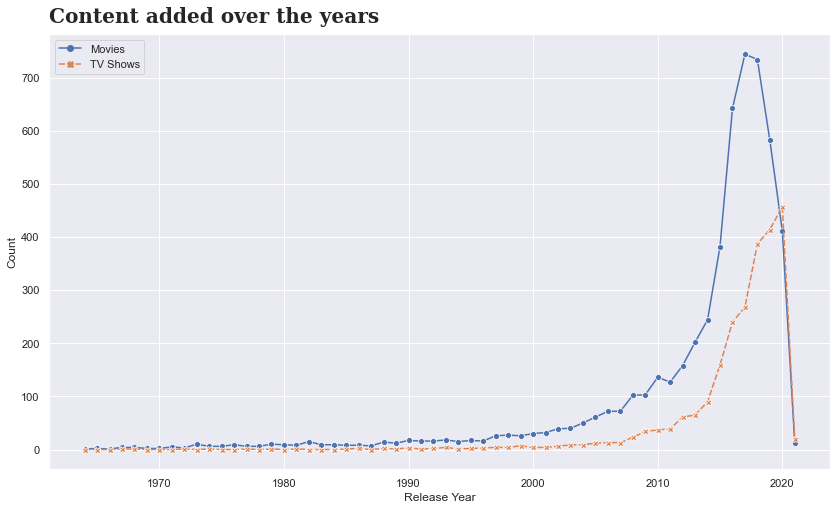

In [36]:
pal = sns.color_palette("pastel")
 
fig, ax = plt.subplots(1, figsize=(14,8))
#sns.lineplot(data=t_movie[15:], ax=ax, markers=True)
sns.lineplot(data=t_plot[15:], ax=ax, markers=True)
plt.xlabel('Release Year')
plt.ylabel('Count')
fig.text(0.125,0.9, "Content added over the years", fontweight="bold", fontfamily='serif', fontsize=20)
plt.show()

Production exploded after 2010 indicating popularity of Netflix. Funding and new users may have also increased during this period. However, production decreased significantly near 2020 - covid-19 pandemic introduced a standstill in production all over the world and hence this decrease. Hopefully, in the coming years, this graph will increase.

### Content released by Month
Here we will look when content was released by month.
<br>Make a new column called **release_month** - get this info from date_added field. 

In [37]:
# Make a new col called release_month
cols = ['date_added', 'type','show_id']
t1_plot = df[cols]
t1_plot['release_month'] = t1_plot['date_added'].apply(lambda cell: cell.month)

#t1_tv = df[df['type']=='TV Show'][cols]
#t1_tv['release_month'] = t1_tv['date_added'].apply(lambda cell: cell.month)

<ipython-input-37-3cd874586f22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_plot['release_month'] = t1_plot['date_added'].apply(lambda cell: cell.month)


In [38]:
t1_plot['release_month'] = t1_plot['date_added'].apply(lambda cell: cell.month)
t1_plot.sort_values(by='release_month', inplace=True)

<ipython-input-38-d8fe94e7657c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_plot['release_month'] = t1_plot['date_added'].apply(lambda cell: cell.month)
<ipython-input-38-d8fe94e7657c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_plot.sort_values(by='release_month', inplace=True)


In [39]:
t1_plot.head()

,date_added,type,show_id,release_month
7145,2021-01-06,Movie,s7146,1
2310,2021-01-01,Movie,s2311,1
7336,2017-01-07,Movie,s7337,1
1233,2019-01-04,TV Show,s1234,1
1232,2021-01-01,Movie,s1233,1


In [40]:
d = {1: 'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
    5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
    9:'Sept',10:'Oct',11:'Nov', 12:'Dec'}
t1_plot['release_month'] = t1_plot['release_month'].apply(lambda x: d[x])

<ipython-input-40-96184d891846>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_plot['release_month'] = t1_plot['release_month'].apply(lambda x: d[x])


In [41]:
t1_plot.head()

,date_added,type,show_id,release_month
7145,2021-01-06,Movie,s7146,Jan
2310,2021-01-01,Movie,s2311,Jan
7336,2017-01-07,Movie,s7337,Jan
1233,2019-01-04,TV Show,s1234,Jan
1232,2021-01-01,Movie,s1233,Jan


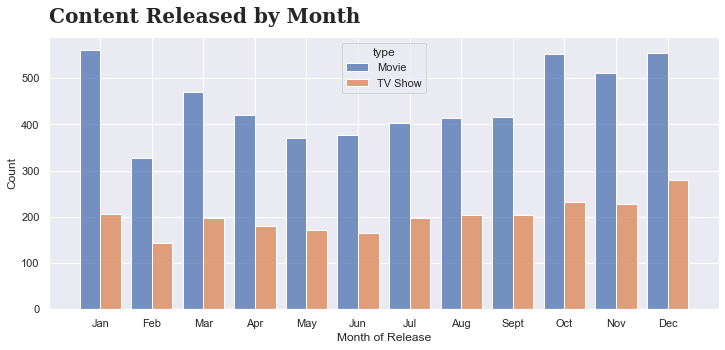

In [42]:
fig, ax = plt.subplots(1, figsize=(12,5))
sns.histplot(data=t1_plot, x='release_month', hue='type', multiple='dodge', ax=ax, shrink=0.8)
plt.xlabel('Month of Release')
fig.text(0.125,0.92, "Content Released by Month", fontweight='bold', fontsize=20, fontfamily='serif')
plt.show()

Most no. of content is released in the October-Jan period (both movies and tv shows).
<br>People most likely are home during this season - probably there are many holidays in this period.

*Note: 10 extra entries are added to January since **date_added** field is missing. But, this no is small (2%) compared to the total production in January, I have overlooked these entries.*

### Find the popular actors based on country
There are shows that have more than one country listed. Take the first country in the list as the main country.

Steps
1. Split the dataframe into frames based on "main_country"
2. From the frame, combine all the cast list together
3. Use collections.Counter to find the most common cast member

In [43]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_seasons,movie_duration,main_country
0,s1,TV Show,3%,NA,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0,NaN,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,NaN,93.0,Mexico


In [114]:
def pop_cast_dir(fr, flag='Movie', typ='cast'):
    
    d_m = fr[fr['type']==flag]
    
    # Combine all the genre entries together and find the most common ones
    cast = ', '.join(d_m[typ]).split(', ')
    cast_coll = collections.Counter(cast).most_common(16)
    
    # Split the tuple list into separate key_list and value_list
    key_cast_coll, val_cast_coll = [x[0] for x in cast_coll if x[0]!='NA'], [x[1] for x in cast_coll if x[0]!='NA']
    return [key_cast_coll, val_cast_coll]


def cast_dir_plot(cast, flag='Movie', typ='cast'):
    atr = {'cast':'Cast', 'director':'Director'}
    fig, ax = plt.subplots(1,len(cast), figsize=(20,6))
    i = 0
    for c in cast:
        sns.barplot(y=cast[c][0], x=cast[c][1], orient='h', palette='flare', ax=ax[i])
        ax[i].set_title(c)
        i += 1
        
    fig.tight_layout()
    fig.text(0.,1,"Most Popular {} {} by Country".format(flag, atr[typ]), fontweight='bold', fontsize=20, fontfamily='serif')
    plt.show()

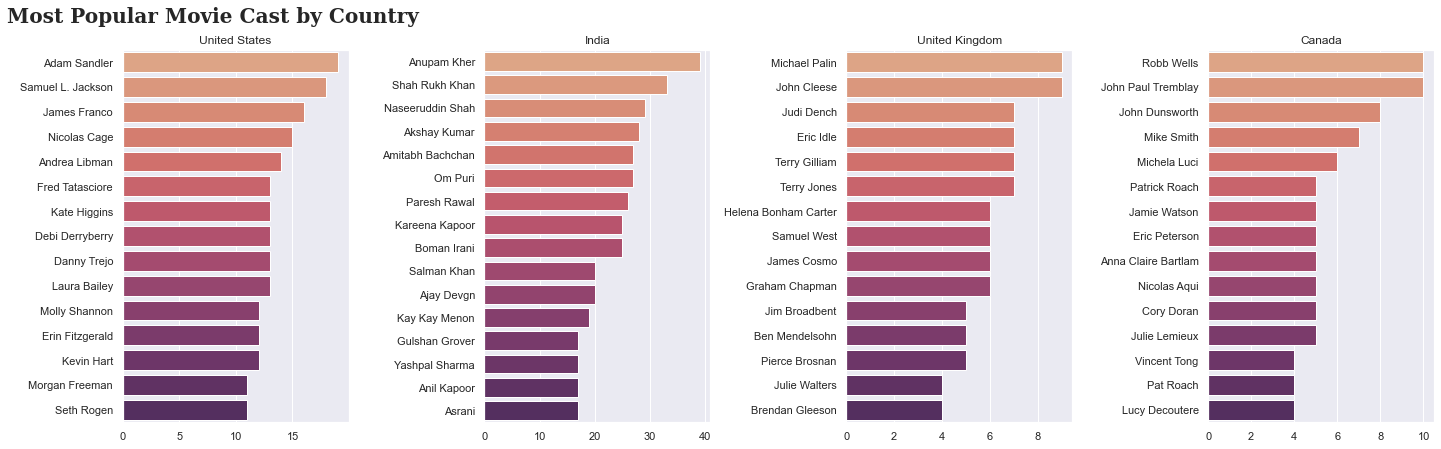

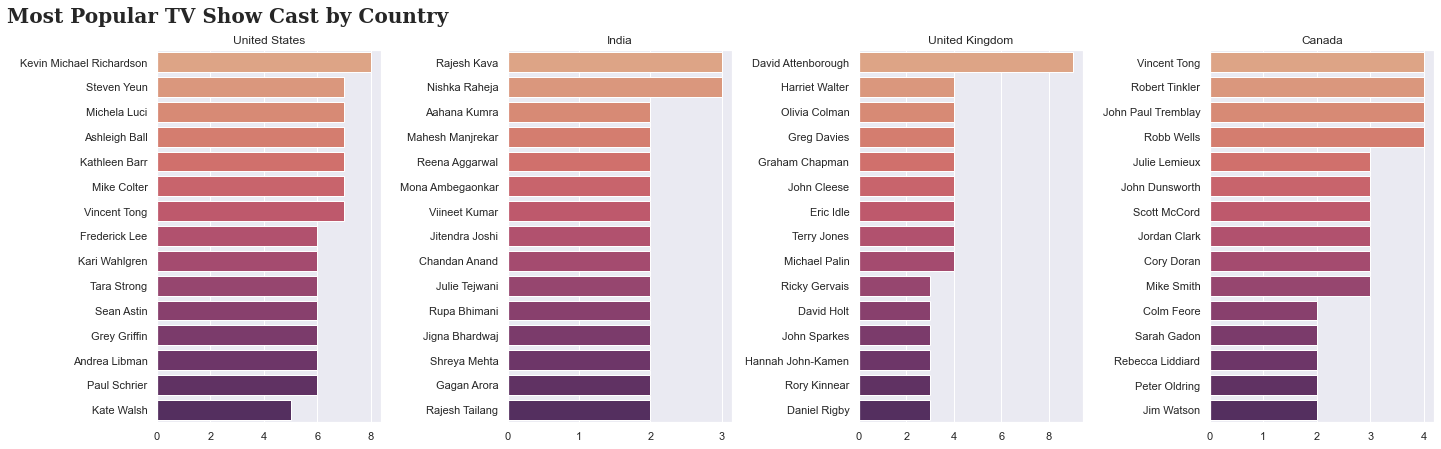

In [115]:
country = ['United States', 'India', 'United Kingdom', 'Canada']
for flag in ['Movie', 'TV Show']:
    country_cast = {}
    for c_ in country:
        frame = df[df['main_country'] == c_]
        country_cast[c_] = pop_cast_dir(frame, flag, 'cast')

    cast_dir_plot(country_cast, flag, 'cast')
    

TV Show have groups of actors with similar no. of appearances, and also, it is very low in number. Most actors in the TV Show business have done less than 3 shows. TV production is still in the nascent stage.

### Popular Directors
Reuse the above functions **pop_cast_dir** and **cast_dir_plot** to find the popular directors for Movie and TV Show by Country

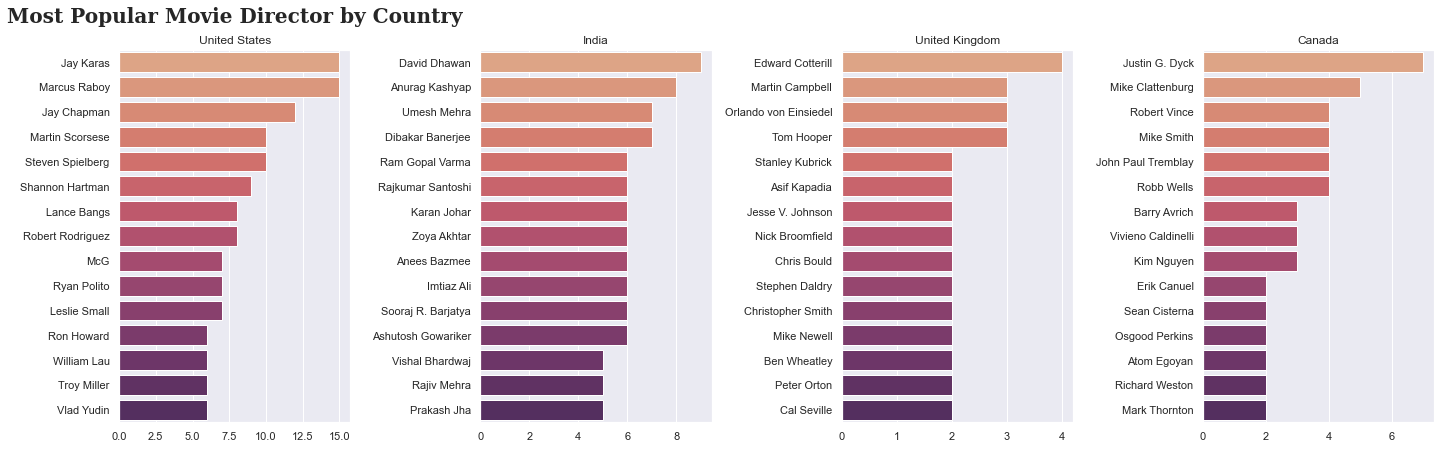

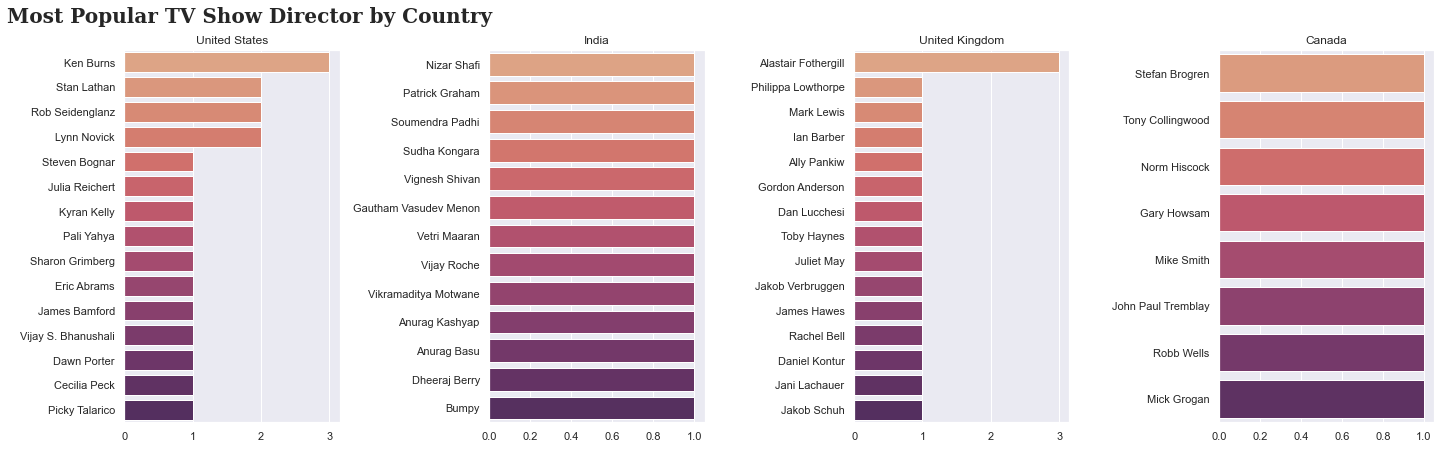

In [116]:
country = ['United States', 'India', 'United Kingdom', 'Canada']
for flag in ['Movie', 'TV Show']:
    country_cast = {}
    for c_ in country:
        frame = df[df['main_country'] == c_]
        country_cast[c_] = pop_cast_dir(frame, flag, 'director')

    cast_dir_plot(country_cast, flag, 'director')
    

### Content Rating

In [51]:
d_m = df[df['type']=='Movie']
d_t = df[df['type']=='TV Show']

In [55]:
t_m = d_m.groupby('rating').agg({'rating':np.count_nonzero}).rename(columns={'rating':'count'}).sort_values(by='count', ascending=False)
t_v = d_t.groupby('rating').agg({'rating':np.count_nonzero}).rename(columns={'rating':'count'}).sort_values(by='count', ascending=False)

Plot bar graphs higlighting the top 3 rating for both Movies and TV Shows. Use color_map for higligting the top 3 ratings

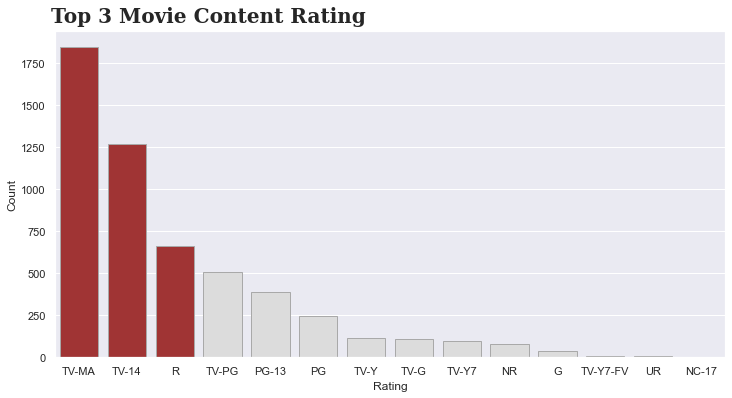

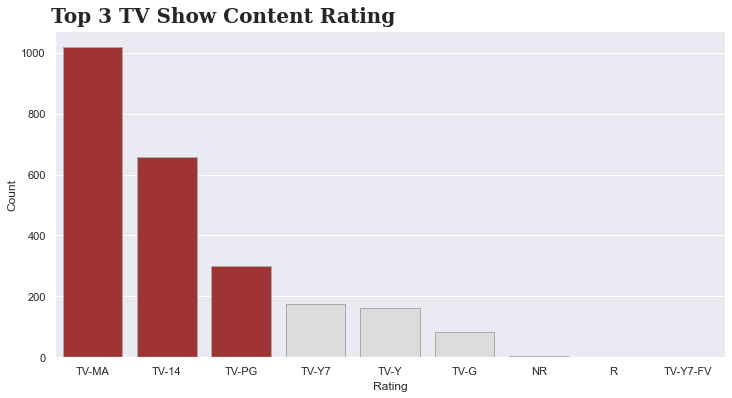

In [113]:
color_map = ['#dcdcdc' if x>2 else '#B22222' for x in range(len(t_m.index))]
sns.set_palette(sns.color_palette(color_map))

for t in [(t_m, "Movie"), (t_v, "TV Show")]:
    fig, ax = plt.subplots(1, figsize=(12,6))
    t_data = t[0]
    t_label = t[1]
    
    sns.barplot(x=t_data.index, y=t_data['count'], edgecolor='darkgrey', linewidth=1, ax=ax)
    plt.xlabel('Rating')
    plt.ylabel('Count')
    fig.text(0.12,0.9,"Top 3 {} Content Rating".format(t_label), fontfamily='serif', fontweight='bold', fontsize=20)
    plt.show()

The top ratings for all contents are TV-MA, TV-14 and TV-PG. **R** Rating is popular more for **Movies** compared to TV Shows.

### Content Genres

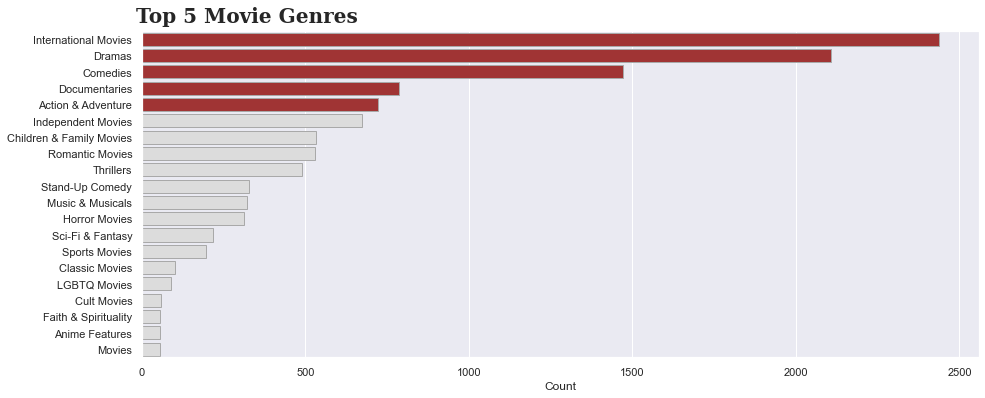

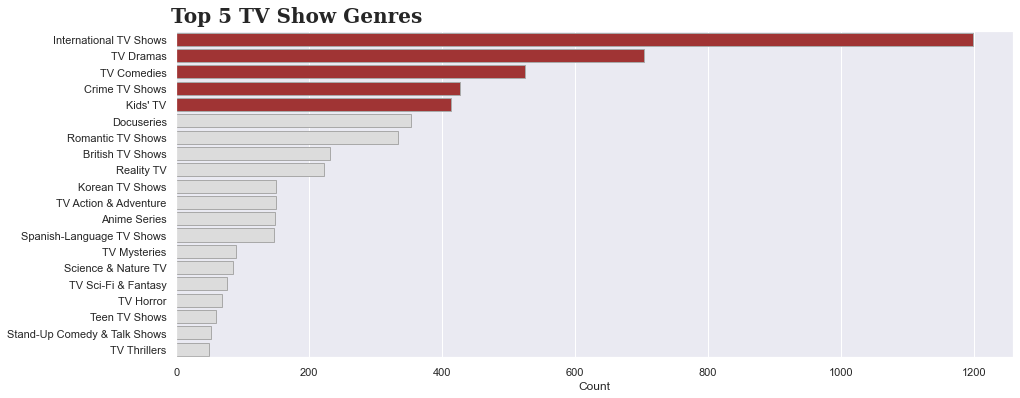

In [134]:
for t in ["Movie","TV Show"]:
    d_ = df[df['type']==t]
    
    # Combine all the genre entries together and find the most common ones
    genre = ', '.join(d_['listed_in']).split(', ')
    genre_coll = collections.Counter(genre).most_common(20)
    
    keys_genre = [x[0] for x in genre_coll]
    val_genre = [x[1] for x in genre_coll]
    
    # Highlight the top 5 genres
    color_map = ['#dcdcdc' if x>4 else '#B22222' for x in range(len(keys_genre))]
    sns.set_palette(sns.color_palette(color_map))
    
    fig, ax = plt.subplots(1, figsize=(15,6))
    t_data = t[0]
    t_label = t[1]
    
    sns.barplot(y=keys_genre, x=val_genre, edgecolor='darkgrey', linewidth=1, orient="h", ax=ax)
    plt.xlabel('Count')

    fig.text(0.12,0.9,"Top 5 {} Genres".format(t), fontfamily='serif', fontweight='bold', fontsize=20)
    plt.show()

The top genres are International shows, Dramas and Comedy. Most content are available internationally and not restricted to a region.